<a href="https://colab.research.google.com/github/SumLama/DemoRepo/blob/main/heartDiseasePrediction/Heart_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all the necessary variables.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Reading the dataset


In [ ]:
df = pd.read_csv('heart_disease.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


As we can see that there are 31K rows with 18 feature columns including the target feature HeartDisease.

The data sample is very informative and is represented by 115295 thousand patient data with 18 feature columns.

The features are described below:

1. HeartDisease - target feature.
2. BMI
3. Smoking
4. AlcoholDrinking
5. Stroke
6. PhysicalHealth
7. MentalHealth
8. DiffWalking
9. Sex
10. AgeCategory
11. Race
12. Diabetic
13. PhysicalActivity
14. GenHealth
15. SleepTime
16. Asthma
17. KidneyDisease
18. Skin Cancer

In [ ]:
df.shape

(319795, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319789 non-null  float64
 2   Smoking           319721 non-null  object 
 3   AlcoholDrinking   319680 non-null  object 
 4   Stroke            319774 non-null  object 
 5   PhysicalHealth    319778 non-null  float64
 6   MentalHealth      319781 non-null  float64
 7   DiffWalking       319762 non-null  object 
 8   Sex               319482 non-null  object 
 9   AgeCategory       319751 non-null  object 
 10  Race              319756 non-null  object 
 11  Diabetic          319762 non-null  object 
 12  PhysicalActivity  319779 non-null  object 
 13  GenHealth         319302 non-null  object 
 14  SleepTime         319576 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
col_order = ['Sex',  'AgeCategory', 'BMI',
             'GenHealth', 'PhysicalActivity', 'PhysicalHealth', 'MentalHealth',
             'SleepTime', 'DiffWalking',
             'Smoking', 'AlcoholDrinking',
             'KidneyDisease', 'Asthma', 'SkinCancer',
             'Stroke', 'Diabetic',
             'Race',
             'HeartDisease']

df = df[col_order]
df.head()

,Sex,AgeCategory,BMI,GenHealth,PhysicalActivity,PhysicalHealth,MentalHealth,SleepTime,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic,Race,HeartDisease
0,Female,55-59,16.60,Very good,Yes,3.0,30.0,5.0,No,Yes,No,No,Yes,Yes,No,Yes,White,No
1,Female,80 or older,20.34,Very good,Yes,0.0,0.0,7.0,No,No,No,No,No,No,Yes,No,White,No
2,Male,65-69,26.58,Fair,Yes,20.0,30.0,8.0,No,Yes,No,No,Yes,No,No,Yes,White,No
3,Female,75-79,24.21,Good,No,0.0,0.0,6.0,No,No,No,No,No,Yes,No,No,White,No
4,Female,40-44,23.71,Very good,Yes,28.0,0.0,8.0,Yes,No,No,No,No,No,No,No,White,No


In [ ]:
df.isnull().sum().sort_values(ascending=False)

GenHealth           493
Sex                 313
SleepTime           219
AlcoholDrinking     115
Smoking              74
AgeCategory          44
Race                 39
DiffWalking          33
Diabetic             33
Stroke               21
PhysicalHealth       17
KidneyDisease        17
PhysicalActivity     16
MentalHealth         14
BMI                   6
Asthma                0
SkinCancer            0
HeartDisease          0
dtype: int64

We see that there are alot of missing values in the data so using Mode to fill the categorical features and mean for the numereical features.

In [ ]:
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])
df['GenHealth'] = df['GenHealth'].fillna(df['GenHealth'].mode()[0])
df['PhysicalActivity'] = df['PhysicalActivity'].fillna(df['PhysicalActivity'].mode()[0])
df['DiffWalking'] = df['DiffWalking'].fillna(df['DiffWalking'].mode()[0])
df['Smoking'] = df['Smoking'].fillna(df['Smoking'].mode()[0])
df['KidneyDisease'] = df['KidneyDisease'].fillna(df['KidneyDisease'].mode()[0])
df['Stroke'] = df['Stroke'].fillna(df['Stroke'].mode()[0])
df['Diabetic'] = df['Diabetic'].fillna(df['Diabetic'].mode()[0])
df['AlcoholDrinking'] = df['AlcoholDrinking'].fillna(df['AlcoholDrinking'].mode()[0])
df['AgeCategory'] = df['AgeCategory'].fillna(df['AgeCategory'].mode()[0])
df['Race'] = df['Race'].fillna(df['Race'].mode()[0])

In [ ]:
df['SleepTime'] = df['SleepTime'].fillna(df['SleepTime'].mean())
df['PhysicalHealth'] = df['PhysicalHealth'].fillna(df['PhysicalHealth'].mean())
df['MentalHealth'] = df['MentalHealth'].fillna(df['MentalHealth'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Sex                 0
AgeCategory         0
Race                0
Diabetic            0
Stroke              0
SkinCancer          0
Asthma              0
KidneyDisease       0
AlcoholDrinking     0
Smoking             0
DiffWalking         0
SleepTime           0
MentalHealth        0
PhysicalHealth      0
PhysicalActivity    0
GenHealth           0
BMI                 0
HeartDisease        0
dtype: int64

Missing Values are handled

Now using Label-Encoding, the categorical features are handled.  

In [ ]:
label = LabelEncoder()
for column in df.columns:
  if df[column].dtype == object:
    df[column] = label.fit_transform(df[column])
df.head(10)

,Sex,AgeCategory,BMI,GenHealth,PhysicalActivity,PhysicalHealth,MentalHealth,SleepTime,DiffWalking,Smoking,AlcoholDrinking,KidneyDisease,Asthma,SkinCancer,Stroke,Diabetic,Race,HeartDisease
0,0,7,16.600000,4,1,3.0,30.0,5.0,0,1,0,0,1,1,0,2,5,0
1,0,12,20.340000,4,1,0.0,0.0,7.0,0,0,0,0,0,0,1,0,5,0
2,1,9,26.580000,1,1,20.0,30.0,8.0,0,1,0,0,1,0,0,2,5,0
3,0,11,24.210000,2,0,0.0,0.0,6.0,0,0,0,0,0,1,0,0,5,0
4,0,4,23.710000,4,1,28.0,0.0,8.0,1,0,0,0,0,0,0,0,5,0
5,0,11,28.870000,1,0,6.0,0.0,12.0,1,1,0,0,0,0,0,0,2,1
6,0,10,21.630000,1,1,15.0,0.0,4.0,0,0,0,0,1,1,0,0,5,0
7,0,12,28.325348,2,0,5.0,0.0,9.0,1,1,0,0,1,0,0,2,5,0
8,0,12,26.450000,1,0,0.0,0.0,5.0,0,0,0,0,0,0,0,1,5,0
9,1,9,40.690000,2,1,0.0,0.0,10.0,1,0,0,0,0,0,0,0,5,0


PRE-PROCESSING

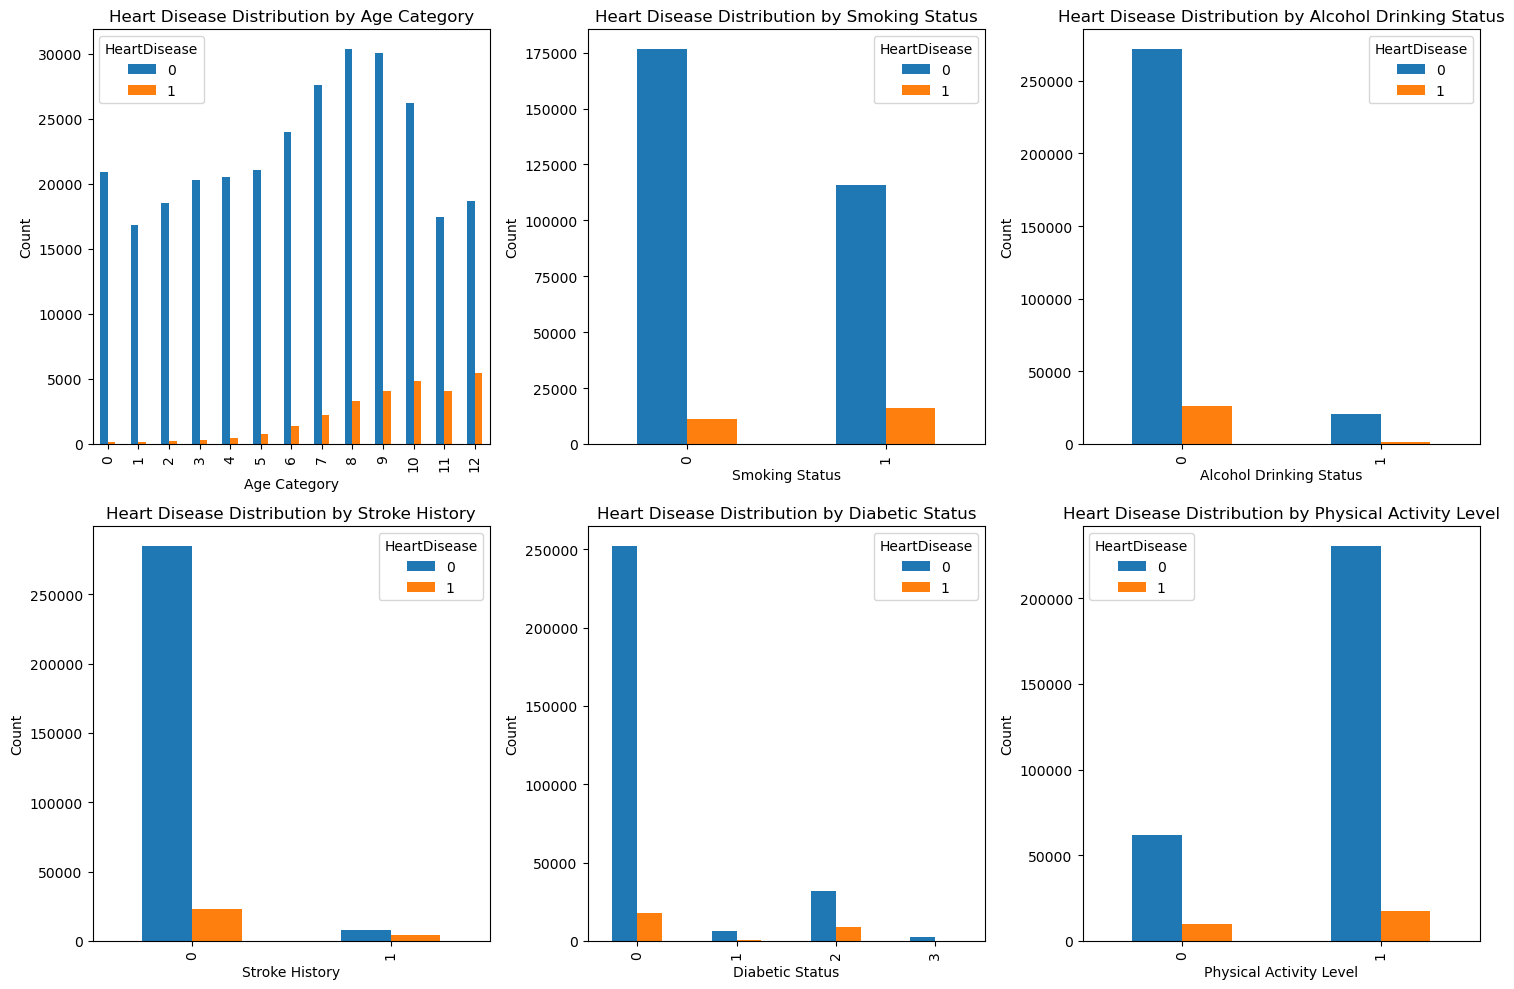

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

df.groupby('AgeCategory')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Heart Disease Distribution by Age Category')
axes[0, 0].set_xlabel('Age Category')
axes[0, 0].set_ylabel('Count')

df.groupby('Smoking')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Heart Disease Distribution by Smoking Status')
axes[0, 1].set_xlabel('Smoking Status')
axes[0, 1].set_ylabel('Count')

df.groupby('AlcoholDrinking')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_title('Heart Disease Distribution by Alcohol Drinking Status')
axes[0, 2].set_xlabel('Alcohol Drinking Status')
axes[0, 2].set_ylabel('Count')

df.groupby('Stroke')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Heart Disease Distribution by Stroke History')
axes[1, 0].set_xlabel('Stroke History')
axes[1, 0].set_ylabel('Count')

df.groupby('Diabetic')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Heart Disease Distribution by Diabetic Status')
axes[1, 1].set_xlabel('Diabetic Status')
axes[1, 1].set_ylabel('Count')

df.groupby('PhysicalActivity')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title('Heart Disease Distribution by Physical Activity Level')
axes[1, 2].set_xlabel('Physical Activity Level')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()


<Axes: >

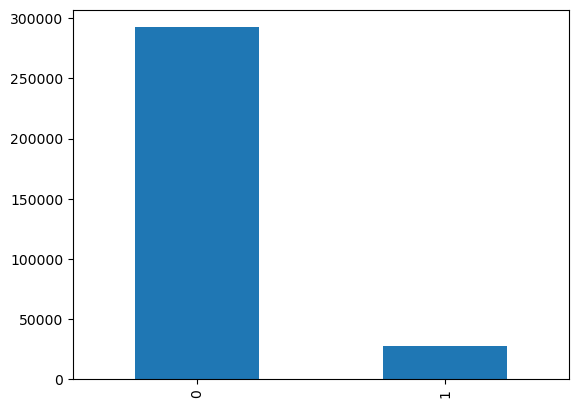

In [ ]:
df['HeartDisease'].value_counts().plot(kind='bar')

Checking for outliers

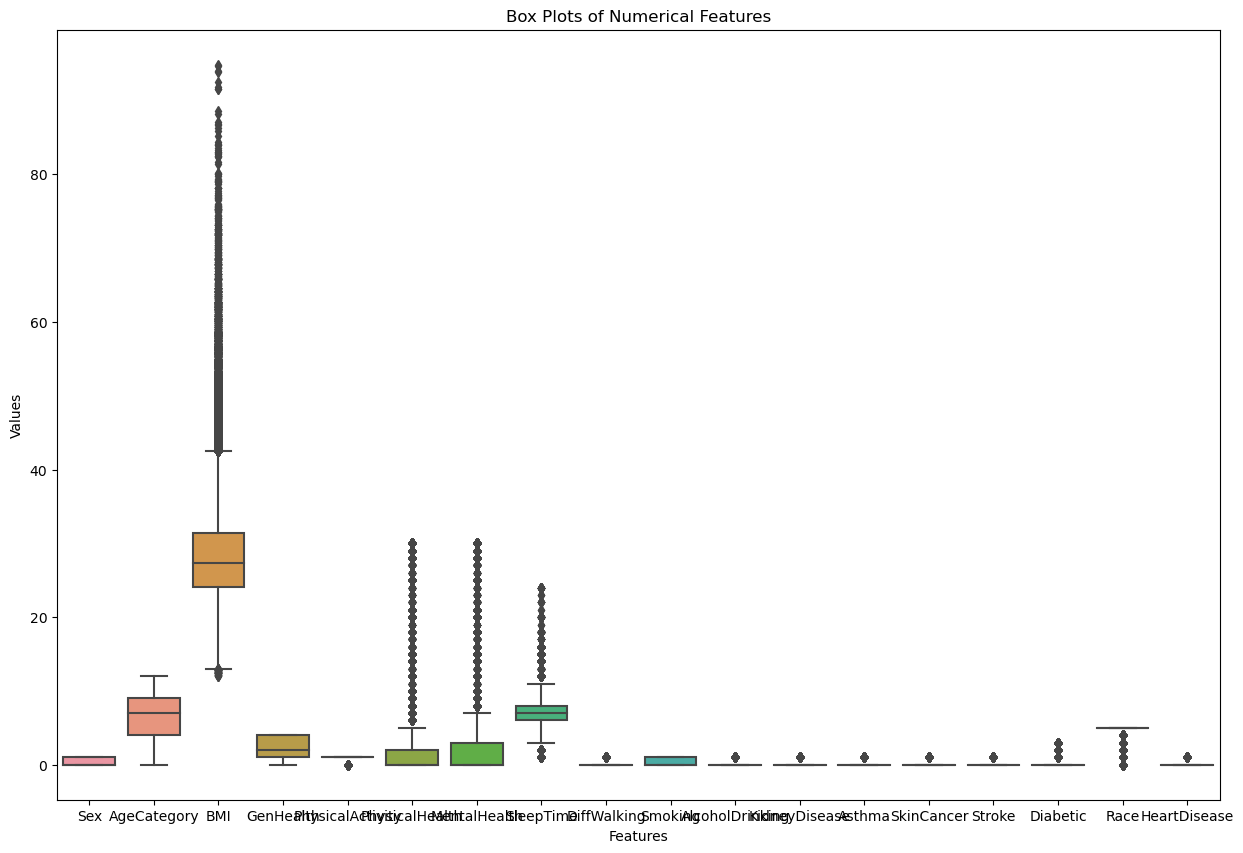

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df, ax=ax)

ax.set_title('Box Plots of Numerical Features')
ax.set_xlabel('Features')
ax.set_ylabel('Values')

plt.show()


We can see that the dataset is imbalanced. So we will be using RandomSampling to reduce the imabalance nature of the dataset

In [ ]:
df['HeartDisease'].value_counts(normalize=True) * 100


0    91.440454
1     8.559546
Name: HeartDisease, dtype: float64

In [ ]:
df_majority = df[df['HeartDisease'] == 0]
df_minority = df[df['HeartDisease'] == 1]

df_minority_upsampled = df_minority.sample(df_majority.shape[0], replace=True, random_state=42)

df_sampled = pd.concat([df_majority, df_minority_upsampled])

df_sampled['HeartDisease'].value_counts().plot(kind='bar')

NameError: name 'df' is not defined

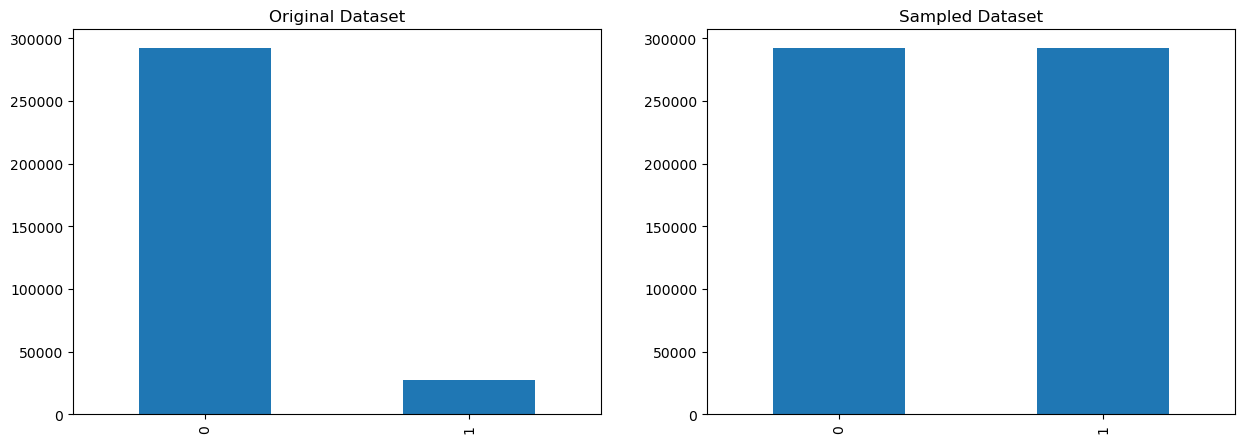

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df['HeartDisease'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Original Dataset')

df_sampled['HeartDisease'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Sampled Dataset')

plt.show()


In [ ]:
df_sampled['HeartDisease'].value_counts(normalize=True) * 100

0    50.0
1    50.0
Name: HeartDisease, dtype: float64

Similarly sampling all the sets according to the feature set


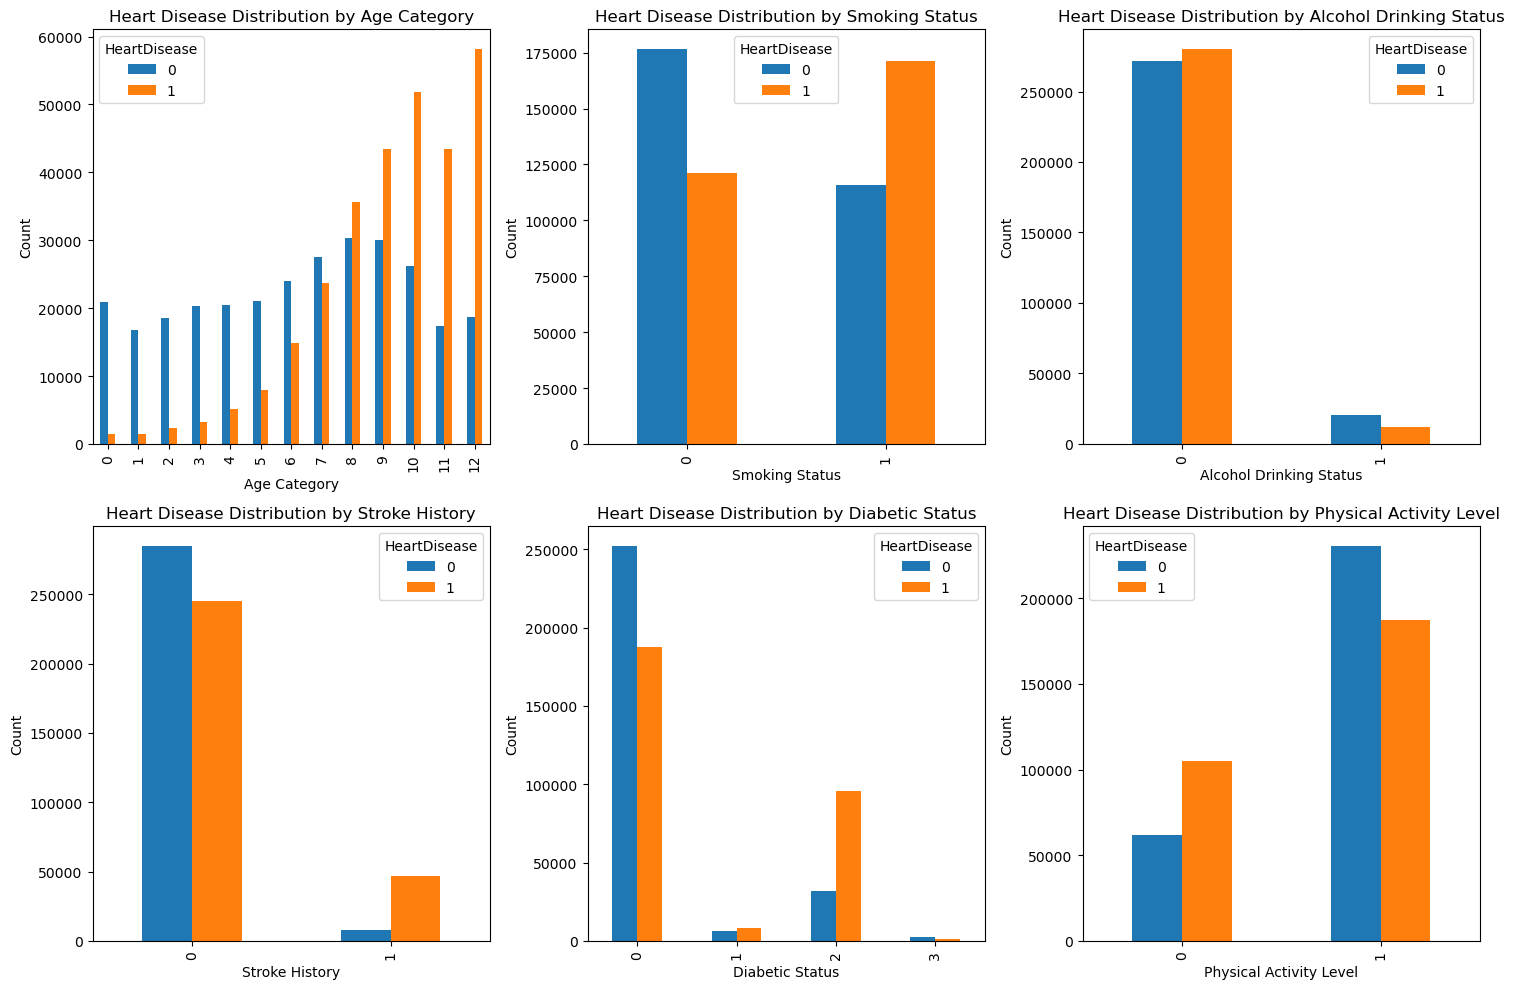

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

df_sampled.groupby('AgeCategory')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Heart Disease Distribution by Age Category')
axes[0, 0].set_xlabel('Age Category')
axes[0, 0].set_ylabel('Count')

df_sampled.groupby('Smoking')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Heart Disease Distribution by Smoking Status')
axes[0, 1].set_xlabel('Smoking Status')
axes[0, 1].set_ylabel('Count')

df_sampled.groupby('AlcoholDrinking')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_title('Heart Disease Distribution by Alcohol Drinking Status')
axes[0, 2].set_xlabel('Alcohol Drinking Status')
axes[0, 2].set_ylabel('Count')

df_sampled.groupby('Stroke')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Heart Disease Distribution by Stroke History')
axes[1, 0].set_xlabel('Stroke History')
axes[1, 0].set_ylabel('Count')

df_sampled.groupby('Diabetic')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Heart Disease Distribution by Diabetic Status')
axes[1, 1].set_xlabel('Diabetic Status')
axes[1, 1].set_ylabel('Count')

df_sampled.groupby('PhysicalActivity')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title('Heart Disease Distribution by Physical Activity Level')
axes[1, 2].set_xlabel('Physical Activity Level')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

<Axes: >

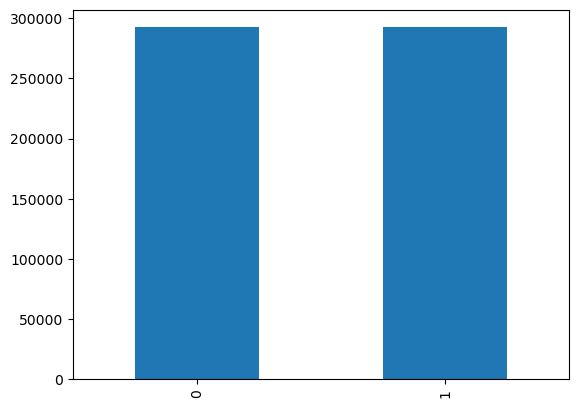

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_majority = df[df['HeartDisease'] == 0]
df_minority = df[df['HeartDisease'] == 1]

df_minority_upsampled = df_minority.sample(df_majority.shape[0], replace=True, random_state=42)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled['HeartDisease'].value_counts().plot(kind='bar')

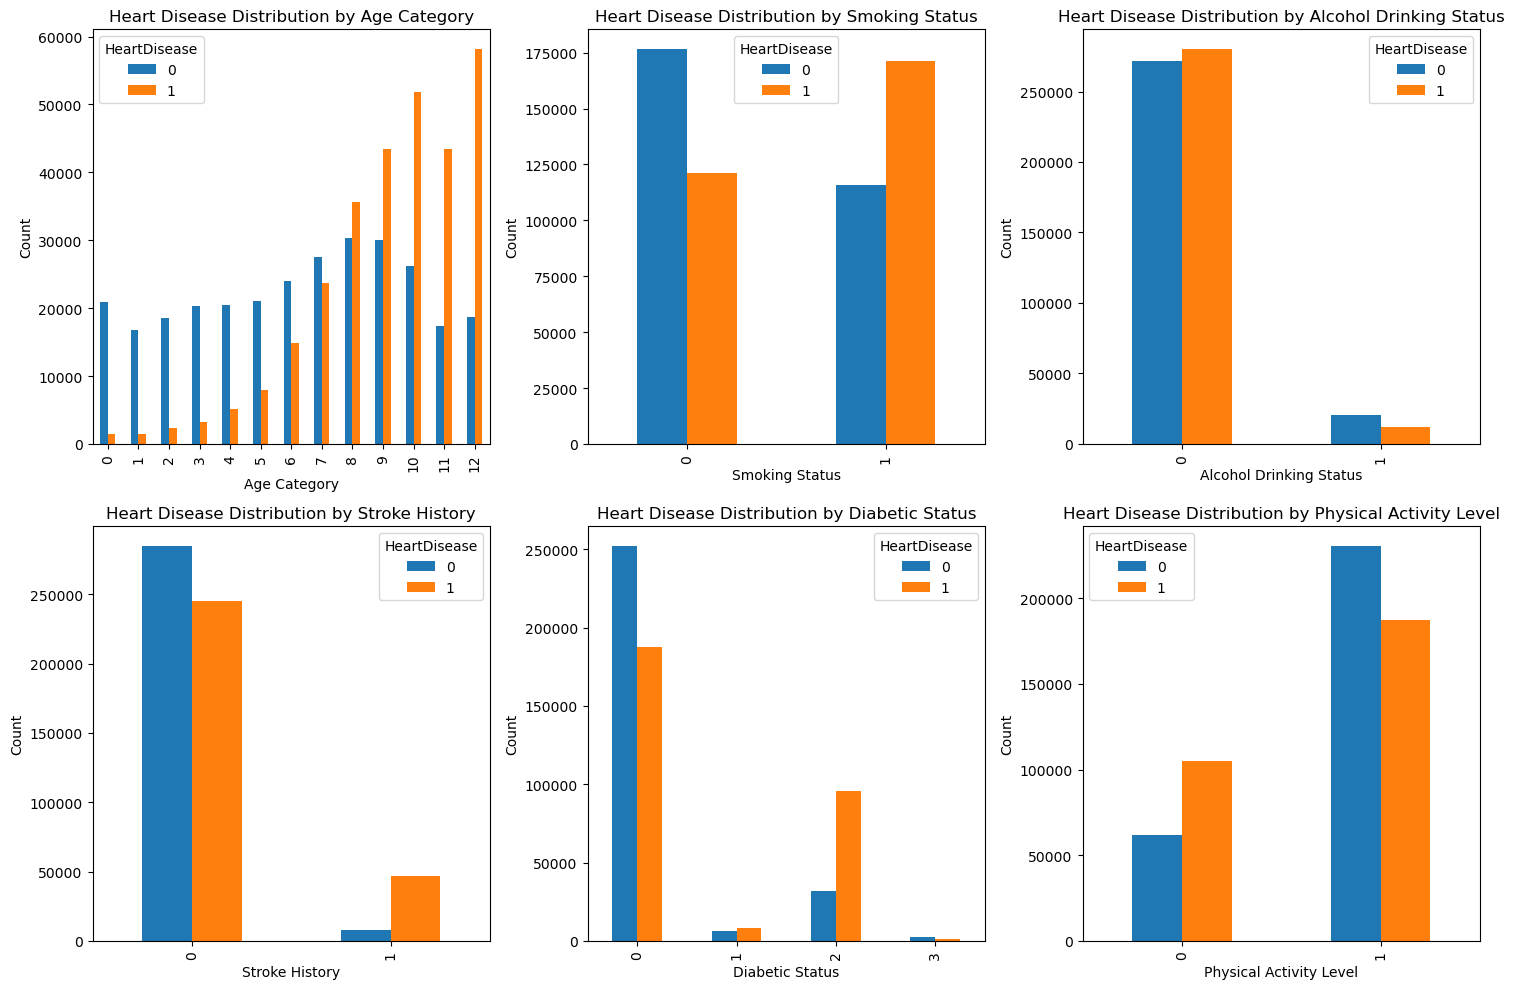

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# First row
df_upsampled.groupby('AgeCategory')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Heart Disease Distribution by Age Category')
axes[0, 0].set_xlabel('Age Category')
axes[0, 0].set_ylabel('Count')

df_upsampled.groupby('Smoking')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Heart Disease Distribution by Smoking Status')
axes[0, 1].set_xlabel('Smoking Status')
axes[0, 1].set_ylabel('Count')

df_upsampled.groupby('AlcoholDrinking')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_title('Heart Disease Distribution by Alcohol Drinking Status')
axes[0, 2].set_xlabel('Alcohol Drinking Status')
axes[0, 2].set_ylabel('Count')

# Second row
df_upsampled.groupby('Stroke')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Heart Disease Distribution by Stroke History')
axes[1, 0].set_xlabel('Stroke History')
axes[1, 0].set_ylabel('Count')

df_upsampled.groupby('Diabetic')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Heart Disease Distribution by Diabetic Status')
axes[1, 1].set_xlabel('Diabetic Status')
axes[1, 1].set_ylabel('Count')

df_upsampled.groupby('PhysicalActivity')['HeartDisease'].value_counts().unstack().plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title('Heart Disease Distribution by Physical Activity Level')
axes[1, 2].set_xlabel('Physical Activity Level')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
X = df_sampled.drop('HeartDisease', axis=1)
y = df_sampled['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
numerical_X_train_feature = X_train.select_dtypes('number')
corr = numerical_X_train_feature.corrwith(y_train)
top_five = np.abs(corr).sort_values(ascending=False).iloc[0:5].index
print("Correlation with Heart  Disease:\n", corr)
print("\nTop 5 features with highest correlation with HeatDisease:\n", top_five)

Correlation with Heart  Disease:
 Sex                 0.123058
AgeCategory         0.440075
BMI                 0.091430
GenHealth          -0.020846
PhysicalActivity   -0.163188
PhysicalHealth      0.242767
MentalHealth        0.046965
SleepTime           0.013106
DiffWalking         0.290623
Smoking             0.189947
AlcoholDrinking    -0.061085
KidneyDisease       0.183549
Asthma              0.068706
SkinCancer          0.142048
Stroke              0.231486
Diabetic            0.254767
Race                0.066259
dtype: float64

Top 5 features with highest correlation with HeatDisease:
 Index(['AgeCategory', 'DiffWalking', 'Diabetic', 'PhysicalHealth', 'Stroke'], dtype='object')


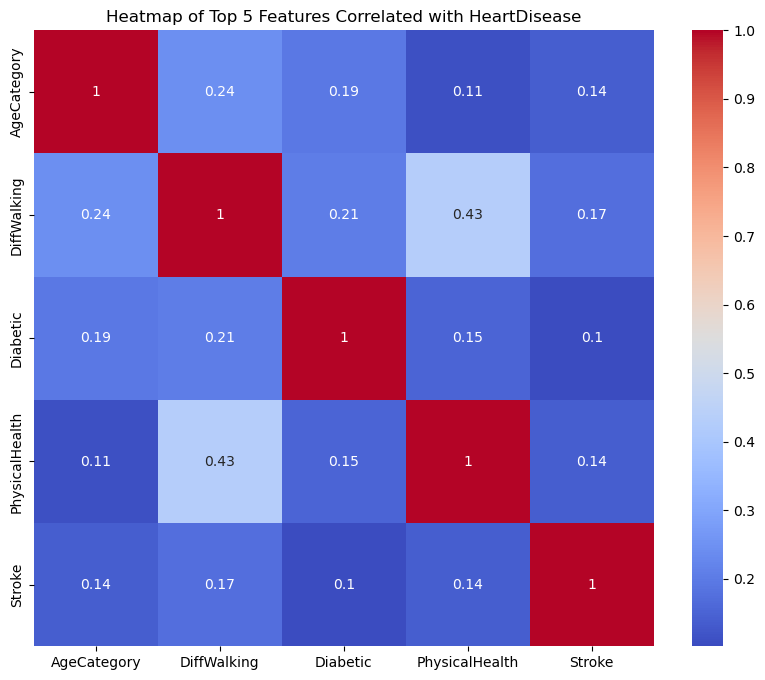

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_five].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap of Top 5 Features Correlated with HeartDisease")
plt.show()

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler

StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = [
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
]

for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print()

Model: RandomForestClassifier
Accuracy: 0.97
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     58529
           1       0.94      1.00      0.97     58440

    accuracy                           0.97    116969
   macro avg       0.97      0.97      0.97    116969
weighted avg       0.97      0.97      0.97    116969

[[55013  3516]
 [   39 58401]]

Model: DecisionTreeClassifier
Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     58529
           1       0.92      1.00      0.96     58440

    accuracy                           0.95    116969
   macro avg       0.96      0.95      0.95    116969
weighted avg       0.96      0.95      0.95    116969

[[53242  5287]
 [   52 58388]]

Model: KNeighborsClassifier
Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     58529
           1       0.83      1.00      0

In [ ]:
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred_proba = model.predict_proba(X_test_scaled)

    print(f"Model: {model.__class__.__name__}")
    print("Predicted Probabilities:")
    print(y_pred_proba)

Model: RandomForestClassifier
Predicted Probabilities:
[[0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.95 0.05]
 [0.   1.  ]
 [0.87 0.13]]
Model: DecisionTreeClassifier
Predicted Probabilities:
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
Model: KNeighborsClassifier
Predicted Probabilities:
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


RandomForestClassifier:This model seems to be very confident in its predictions, as indicated by the predicted probabilities. For most samples, it assigns a very high probability (close to 1) to the predicted class. This high confidence suggests that the model is well-calibrated and makes decisive predictions.

DecisionTreeClassifier and KNeighborsClassifier:These models also exhibit high confidence in their predictions, with most samples having probabilities close to 0 or 1 for the predicted classes. However, there may be some instances where these models are less certain, as indicated by probabilities that are not close to 0 or 1.

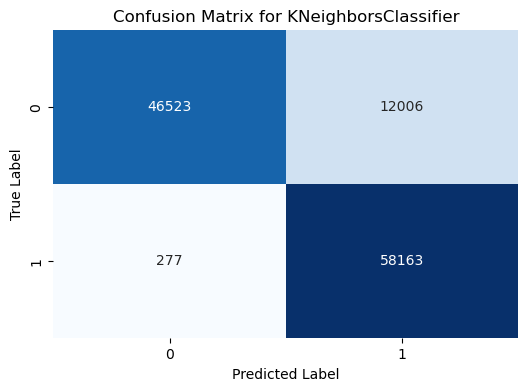

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix for {model.__class__.__name__}")
plt.show()

In [ ]:
import pickle

for model in models:
  model_name = model.__class__.__name__
  with open(f'{model_name}.pkl', 'wb') as file:
    pickle.dump(model, file)

RandomForestClassifier:

Accuracy: 0.97
Precision: 1.00 for class 0, 0.94 for class 1
Recall: 0.94 for class 0, 1.00 for class 1
F1-score: 0.97 for both classes.
The RandomForestClassifier model achieves high accuracy and performs well in terms of precision, recall, and F1-score for both classes. It has slightly lower precision for class 1 compared to class 0. The confusion matrix shows that it has relatively few false positives and false negatives.


DecisionTreeClassifier:

Accuracy: 0.95
Precision: 1.00 for class 0, 0.92 for class 1
Recall: 0.91 for class 0, 1.00 for class 1
F1-score: 0.95 for both classes
The DecisionTreeClassifier model also performs well with high accuracy and good precision, recall, and F1-score for both classes. Similar to RandomForestClassifier, it has slightly lower precision for class 1 compared to class 0. The confusion matrix indicates a relatively small number of misclassifications.


KNeighborsClassifier:

Accuracy: 0.89
Precision: 0.99 for class 0, 0.83 for class 1
Recall: 0.79 for class 0, 1.00 for class 1
F1-score: 0.88 for class 0, 0.90 for class 1
The KNeighborsClassifier model has the lowest accuracy among the three models. While it has high precision for class 0, it suffers from lower recall for class 0, leading to more false negatives.
